<p align="left">
<img src="https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/Image/ibm-logo.png"
width="500" />
</p>

# **Supervised Machine Learning: Regression**

**Notebook content**
> **WEEK 2** - Data Splits and Cross Validation
> * 2.1 - Training and Test Splits
> * 2.2 - Cross Validation
> * 2.3 - Polynomial Regression

# **Week 2.1 - Training and Test Splits**

Notebook of my notes for the week 2.1 of the course [Supervised Machine Learning: Regression](https://www.coursera.org/learn/supervised-machine-learning-regression) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

## **TRAIN TEST SPLIT**

### **Training and Test Split**

* **Training Data $\longrightarrow$ Fit the model**
* **Training Data $\longrightarrow$ Measure performance**

    * Predict label with model
    * Compare with actual value
    * Measure error

### **Syntax**

Import the train and test function


```
from sklearn.model_selection import train_test_split
```

Split the data and put 35% into test set

```
train, test = train_test_split(data, test_size=0.3)
```

Other method for splitting data


```
from sklearn.model_selection import ShuffleSplit
```





### **Course 2, Part b:** Regression Setup, Train-test Split LAB

**Introduction**

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

**Predictor**

* SalePrice: The property's sale price in dollars. 

**Features**

* MoSold: Month Sold
* YrSold: Year Sold   
* SaleType: Type of sale
* SaleCondition: Condition of sale
* MSSubClass: The building class
* MSZoning: The general zoning classification
* ...

#### **Question 1**

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [ ]:
import pandas as pd
import numpy as np

# Import the data using the file path
filepath = 'https://raw.githubusercontent.com/Raoni-Silva/IBM_MachineLearning/main/02%20-%20Supervised%20Machine%20Learning%20-%20Regression/Data/Ames_Housing_Sales.csv'
data = pd.read_csv(filepath, sep=',')

print(data.shape)

(1379, 80)


In [ ]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

#### **Question 2**

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. 

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [ ]:
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

215

#### **Question 3**

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Copy data
data_ohc = data.copy()

# Create onehotencoder object
ohc = OneHotEncoder()

for col in num_ohc_cols.index:

  # One hot encode the data--this returns a sparse array
  new_dat = ohc.fit_transform(data_ohc[[col]])

  # Drop original column from datafram
  data_ohc = data_ohc.drop(col, axis=1)

  # Gets names of all unique values in column so we can identify later
  cats = ohc.categories_

  # Create column names for each OHE column bt value
  new_cols = ['_'.join([col,cat]) for cat in cats[0]]

  # Create the new dataframe
  new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)

  # Append the new data to the dataframe
  data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [ ]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

215

In [ ]:
print(data.shape[1])

# Remove the strings columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


#### **Question 4**

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Data not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Data one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, test_size=0.3, random_state=42)

In [ ]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test': mean_squared_error(y_test, y_test_pred)},
                          name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test': mean_squared_error(y_test_ohc, y_test_ohc_pred)},
                          name='one_hot enc'))

# Assemble the result
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one_hot enc
train,1.131507e+09,3.177264e+08
test,1.372182e+09,2.089927e+17


#### **Question 5**

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler()}

# Initialize model
LR = LinearRegression()

# Iterate over all possible combinations and get the errors
errors = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'scaling: '
  errors[key] = mean_squared_error(y_test, predictions)

errors = pd.Series(errors)

for key, error_val in errors.items():
  print(key, error_val)

standardscaling:  1372182358.9345078
minmaxscaling:  1372182358.9345083


#### **Question 6**

Plot predictions vs actual for one of the models.

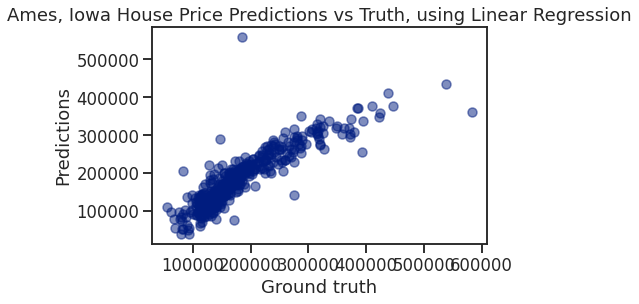

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(y_test, y_test_pred, alpha=0.5)

ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

# **Week 2.2 - Cross Validation**

Notebook of my notes for the week 2.2 of the course [Supervised Machine Learning: Regression](https://www.coursera.org/learn/supervised-machine-learning-regression) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

## **CROSS VALIDATION**

### **Cross Validation Approaches**

* **K-fold Cross Validation:** Using each of k subsamples as a test sample

* **Leave One Out Cross Validation:** Using each observation as a test sample

* **Stratified Cross Validation:** K-fold Cross Validation with representative samples

Increasing k in k-fol cross-validation will usually increase the variance of estimated parameters.

### **Syntax**

Import the cross-validation function


```
from sklearn.model_selection import cross_val_score
```

Perform cross-validation with a given model


```
cross_val = cross_val_score(model, X_data, y_data, cv=4, scoring='neg_mean_squared_error')
```

Other methos for cross validation:


```
from sklearn.model_selection import KFold, StratifiedKFold
```







### **Course 2, Part c:** Cross Validation DEMO

**Learning objectives**


By the end of this lesson, you will be able to:

* Chain multiple data processing steps together using `Pipeline`
* Use the `KFolds` object to split data into multiple folds.
* Perform cross validation using SciKit Learn with `cross_val_predict` and `GridSearchCV`


In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [ ]:
# Note we are loading a slighly different ("cleaned") pickle file
url = 'https://github.com/Raoni-Silva/IBM_MachineLearning/raw/main/02%20-%20Supervised%20Machine%20Learning%20-%20Regression/Data/boston_housing_clean.pickle'
boston = pd.read_pickle(url)

In [ ]:
boston.keys()

dict_keys(['dataframe', 'description'])

In [ ]:
boston_data = boston['dataframe']
boston_description = boston['description']

In [ ]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### **Discussion:**

Suppose we want to do Linear Regression on our dataset to get an estimate, based on mean squared error, of how well our model will perform on data outside our dataset. 

Suppose also that our data is split into three folds: Fold 1, Fold 2, and Fold 3.

Consider how you might explain the steps to do this.

**Coding this up**

The [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) object in SciKit Learn tells the cross validation object (see below) how to split up the data:

In [ ]:
X = boston_data.drop('MEDV', axis=1)
y = boston_data['MEDV']

In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [ ]:
for train_index, test_index in kf.split(X):
  print('Train index:', train_index[:10], len(train_index))
  print("Test index:", test_index[:10], len(test_index))
  print(" ")


Train index: [ 1  3  4  5  7  8 10 11 12 13] 337
Test index: [ 0  2  6  9 15 17 19 23 25 26] 169
 
Train index: [ 0  2  6  9 10 11 12 13 15 17] 337
Test index: [ 1  3  4  5  7  8 14 16 22 27] 169
 
Train index: [0 1 2 3 4 5 6 7 8 9] 338
Test index: [10 11 12 13 18 20 21 24 28 31] 168
 


In [ ]:
scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = (X.iloc[train_index, :],
                                      X.iloc[test_index, :],
                                      y[train_index],
                                      y[test_index])
  
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  score = r2_score(y_test.values, y_pred)
  
  scores.append(score)

scores

[0.6719348798472724, 0.7485020059212374, 0.6976807323597793]

#### **Discussion (Part 2):**

Now suppose we want to do the same, but appropriately scaling our data as we go through the folds.

What would the steps be _now_?

**Coding this up**

In [ ]:
scores = []
lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
  X_train, X_test, y_train, y_test = (X.iloc[train_index, :],
                                      X.iloc[test_index, :],
                                      y[train_index],
                                      y[test_index])
  
  X_train_s = s.fit_transform(X_train)
  
  lr.fit(X_train_s, y_train)

  X_test_s = s.transform(X_test)

  y_pred = lr.predict(X_test_s)

  score = r2_score(y_test.values, y_pred)
  
  scores.append(score)

scores

[0.6719348798472715, 0.7485020059212382, 0.6976807323597745]

(same scores, because for vanilla linear regression with no regularization, scaling actually doesn't matter for performance)

This is getting quite cumbersome! 

_Very_ luckily, SciKit Learn has some wonderful functions that handle a lot of this for us.

`Pipeline` and `cross_val_predict`

In [ ]:
s = StandardScaler()
lr = LinearRegression()

Combine multiple processing steps into a `Pipeline`

A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step.  

In [ ]:
estimator = Pipeline([("scaler", s), ("regression", lr)])

`cross_val_predict`

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

In [ ]:
predictions = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions)

0.706353106416156

In [ ]:
np.mean(scores) #almost identical

0.7060392060427615

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`. 

#### **Hyperparameter Tuning**

**Definition**

>**Hyperparameter tuning** involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that _generalizes_ well outside of your sample.

**Mechanics**

>We can generate an exponentially spaces range of values using the numpy [`geomspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html#numpy.geomspace) function.
>
>```python
>np.geomspace(1, 1000, num=4)
>```
>
>produces:
>
>```
array([    1.,    10.,   100.,  1000.])
```
>
>Use this function to generate a list of length 10 called `alphas` for hyperparameter tuning:

In [ ]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [ ]:
scores = []
coefs = []
for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=100000)

  estimator = Pipeline([('scaler', s),
                        ('lasso_regression', las)])
  
  predictions = cross_val_predict(estimator, X, y, cv=kf)

  score = r2_score(y, predictions)

  scores.append(score)

In [ ]:
list(zip(alphas, scores))

[(1e-09, 0.7063531064981925),
 (1e-08, 0.7063531072356071),
 (1e-07, 0.7063531145602442),
 (1e-06, 0.7063531882052063),
 (1e-05, 0.7063539165191507),
 (0.0001, 0.706361268093463),
 (0.001, 0.706433467041546),
 (0.01, 0.7070865958083233),
 (0.1, 0.705838151167185),
 (1.0, 0.6512724532884888)]

In [ ]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [ ]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

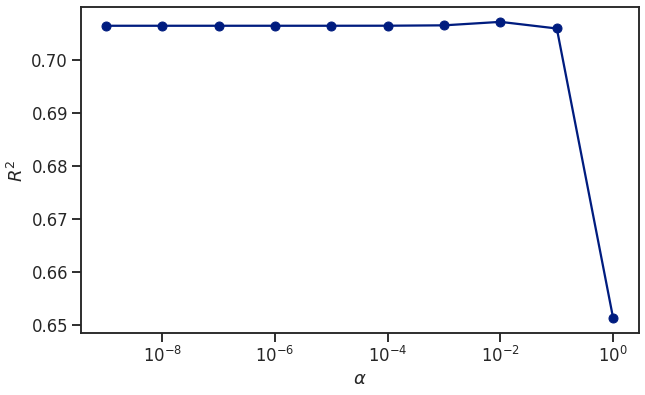

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

#### **Exercise:** Polynomial Features and Pipeline

Add `PolynomialFeatures` to this `Pipeline`, and re-run the cross validation with the `PolynomialFeatures` added.

**Hint #1:** pipelines process input from first to last. Think about the order that it would make sense to add Polynomial Features to the data in sequence and add them in the appropriate place in the pipeline.

**Hint #2:** you should see a significant increase in cross validation accuracy from doing this

In [ ]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.001, 10, 5)
for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=100000)

  estimator = Pipeline([('make_higher_degree', pf),
                        ('scaler', s),
                        ('lasso_regression', las)])
  
  predictions = cross_val_predict(estimator, X, y, cv=kf)
  
  score = r2_score(y, predictions)

  scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.838350315978914, tolerance: 2.73469821958457
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.42698296107426, tolerance: 2.777101952522255
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.853000368234916, tolerance: 3.030405585798817
  positive)


If you store the results in a list called `scores`, the following will work:

In [ ]:
alphas

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [ ]:
scores

[0.7697086980421659,
 0.8591002095361691,
 0.8280423631185617,
 0.7328688516176427,
 -0.000616160136140298]

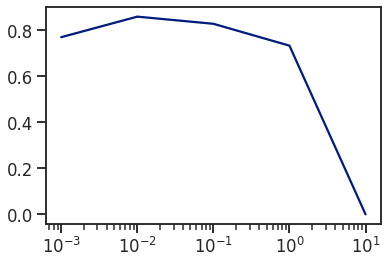

In [ ]:
plt.semilogx(alphas, scores);

In [ ]:
best_estimator = Pipeline([('make_higher_degree', PolynomialFeatures(degree=2)),
                           ('scaler', s),
                           ('lasso_regression', Lasso(alpha=0.01, max_iter=10000))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9032551408154241

In [ ]:
best_estimator.named_steps['lasso_regression'].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.61127587e+00,  0.00000000e+00,  6.24240557e-01,  0.00000000e+00,
       -7.22878514e+00,  9.74968793e+00,  0.00000000e+00,  0.00000000e+00,
        6.34548325e-01,  0.00000000e+00,  9.95741679e-01, -5.51374291e-03,
       -0.00000000e+00,  2.44370838e+00, -2.40444044e+00, -0.00000000e+00,
       -0.00000000e+00, -2.23044443e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.88128934e-01,  5.17203914e-01,  3.07715719e-01,
       -3.39853933e-01, -9.86590910e-02, -0.00000000e+00,  2.72847487e-01,
       -0.00000000e+00, -6.39829763e-01, -3.16474346e-01,  1.44555554e+00,
        0.00000000e+00, -0.00000000e+00, -8.84630187e-01,  1.32081558e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.63148300e+00,
       -2.62941147e-01,  0.00000000e+00,  9.08410143e-01, -8.17144528e-01,
        0.00000000e+00, -4.31628234e+00,  5.53254405e-01, -2.91912598e+00,
       -4.68486241e+00,  

#### **Exercise:** Ridge Regression

Do the same, but with `Ridge` regression 

Which model, `Ridge` or `Lasso`, performs best with its optimal hyperparameters on the Boston dataset?

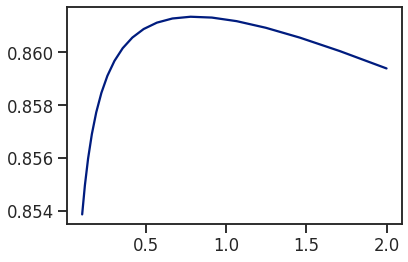

In [ ]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(0.1, 2, 20)
scores = []
for alpha in alphas:
  ridge = Ridge(alpha=alpha, max_iter=100000)

  estimator = Pipeline([('polynomial_features', pf),
                        ('scaler', s),
                        ('ridge_regression', ridge)])
  
  predictions = cross_val_predict(estimator, X, y, cv=kf)

  score = r2_score(y, predictions)
  scores.append(score)

plt.plot(alphas, scores);

**Conclusion:** Both Lasso and Ridge with proper hyperparameter tuning give better results than plain ol' Linear Regression!

#### **Exercise:** Feature Importances

Now, for whatever your best overall hyperparameter was: 

* Standardize the data
* Fit and predict on the entire dataset
* See what the largest coefficients were
    * Hint: use 
    ```python
    dict(zip(model.coef_, pf.get_feature_names()))
    ```
    for your model `model` to get the feature names from `PolynomialFeatures`.
    
    Then, use
    ```python
    dict(zip(list(range(len(X.columns.values))), X.columns.values))
    ```
    
    to see which features in the `PolynomialFeatures` DataFrame correspond to which columns in the original DataFrame.


In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data

best_estimator = Pipeline([('make_higher_degree', PolynomialFeatures(degree=2, include_bias=False)),
                           ('scaler', s),
                           ('lasso_regression', Lasso(alpha=0.01))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 838.7320342368375, tolerance: 4.2716295415019765
  positive)


0.9047578542960124

In [ ]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps['make_higher_degree'].get_feature_names(input_features=X.columns),
                                  best_estimator.named_steps['lasso_regression'].coef_))

In [ ]:
df_importances.sort_values(by=1)

,0,1
72,RM TAX,-7.484883
63,NOX RAD,-5.324131
71,RM RAD,-4.516639
93,RAD LSTAT,-4.455994
48,INDUS LSTAT,-4.416767
...,...,...
3,CHAS,4.057486
103,LSTAT^2,5.467342
95,TAX PTRATIO,7.142666
68,RM^2,8.325413


#### **Exercise:** Grid Search CV

To do cross-validation, we used two techniques:
- use `KFolds` and manually create a loop to do cross-validation
- use `cross_val_predict` and `score` to get a cross-valiated score in a couple of lines.

To do hyper-parameter tuning, we see a general pattern:
- use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one.

Perhaps not surprisingly, there is a function that does this for us -- `GridSearchCV`

In [ ]:
from sklearn.model_selection import GridSearchCV

# same estimator as before
estimator = Pipeline([('polynomial_features', PolynomialFeatures()),
                      ('scaler', StandardScaler()),
                      ('ridge_regression', Ridge())])

params = {'polynomial_features__degree': [1, 2, 3],
          'ridge_regression__alpha': np.geomspace(4, 20, 30)}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomial_features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('ridge_regression',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercep...
        5.27924796,  5.58051751,  5.8989

In [ ]:
grid.best_score_, grid.best_params_

(0.8546333782070428,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 4.0})

In [ ]:
y_predict = grid.predict(X)

In [ ]:
r2_score(y, y_predict)

0.8964707714558113

In [ ]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00,  2.47147038e-01, -1.18377806e+00,  1.11700133e+00,
        1.02268931e+00,  1.11573592e+00,  2.63515343e+00,  1.60400844e+00,
       -2.44378403e+00,  2.67549673e+00,  1.18120641e+00,  3.00931414e-01,
        7.17164316e-01,  5.46697603e-01,  1.16368605e+00,  2.78583120e-01,
        4.15770986e-01,  2.45396270e+00, -1.07012228e+00, -8.15812777e-01,
       -2.95036466e-01, -8.26480829e-01, -4.23552596e-01, -4.33022591e-02,
        8.34930099e-02, -4.92838202e-01,  5.12447325e-01,  5.88355149e-01,
       -3.50662224e-01, -1.39184102e-01, -2.99737738e-01,  1.02696466e+00,
        1.47705864e-02, -6.87593891e-01, -3.12176710e-01,  1.26476807e+00,
        1.01258007e+00, -5.51925730e-01, -8.62269698e-01,  8.78832853e-01,
        6.75975245e-02,  5.91362874e-01, -1.45086000e+00,  1.09286634e+00,
       -7.69112663e-01,  1.16978387e+00,  1.29460196e+00, -7.36888615e-01,
        7.29205860e-01, -2.44086792e+00,  1.02268931e+00, -2.26162754e+00,
       -2.56091292e+00,  

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomial_features__degree,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004220,0.001576,0.001525,0.000158,1,4,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672111,0.748235,0.701801,0.707382,0.031327,90
1,0.002881,0.000011,0.001334,0.000013,1,4.22827,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672103,0.748207,0.701986,0.707432,0.031307,89
2,0.003062,0.000018,0.001371,0.000028,1,4.46956,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672093,0.748175,0.702178,0.707482,0.031286,88
3,0.003002,0.000038,0.001396,0.000029,1,4.72462,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672081,0.748141,0.702375,0.707533,0.031265,87
4,0.003058,0.000112,0.001402,0.000011,1,4.99424,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672067,0.748104,0.702579,0.707583,0.031243,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.026267,0.008167,0.006178,0.001611,3,16.0184,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827782,0.867759,0.859693,0.851745,0.017261,23
86,0.019066,0.001196,0.004321,0.000578,3,16.9326,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827717,0.867351,0.859455,0.851508,0.017129,25
87,0.020334,0.000122,0.005138,0.000880,3,17.8989,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827628,0.866926,0.859179,0.851244,0.016996,27
88,0.021022,0.001735,0.004264,0.000271,3,18.9203,"{'polynomial_features__degree': 3, 'ridge_regr...",0.827515,0.866483,0.858866,0.850955,0.016863,30


## **SUMMARY**

1. We can manually generate folds by using `KFolds`
2. We can get a score using `cross_val_predict(X, y, cv=KFoldObject_or_integer)`. 
   This will produce the out-of-bag prediction for each row.
3. When doing hyperparameter selection, we should be optimizing on out-of-bag scores. This means either using `cross_val_predict` in a loop, or ....
4. .... use `GridSearchCV`. GridSearchCV takes a model (or pipeline) and a dictionary of parameters to scan over. It finds the hyperparameter set that has the best out-of-sample score on all the parameters, and calls that it's "best estimator". It then retrains on all data with the "best" hyper-parameters.



## **EXTENSIONS**

Here are some additional items to keep in mind:
* There is a `RandomSearchCV` that tries random combination of model parameters. This can be helpful if you have a prohibitive number of combinations to test them all exhaustively.
* KFolds will randomly select rows to be in the training and test folds. There are other methods (such as `StratifiedKFolds` and `GroupKFold`, which are useful when you need more control over how the data is split (e.g. to prevent data leakage). You can create these specialized objects and pass them to the `cv` argument of `GridSearchCV`.

# **Week 2.3 - Polynomial Regression**

Notebook of my notes for the week 2.3 of the course [Supervised Machine Learning: Regression](https://www.coursera.org/learn/supervised-machine-learning-regression) as part of the [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning).

## **POLYNOMIAL REGRESSION**

### **Addition of Polynomial Features**

Capture higher order features of data by adding polynomial features.

$$
y_{\beta}(x)=\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}
$$

<br>

Can algo be include variables interactions:
$$
y_{\beta}(x)=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\beta_{3}x_{1}x_{2}
$$


### **Enhancing the Linear Model**

Adjusting the standar linear approach to regression by adding polynomial features is one of many approaches to dealing with the **fundamental problems**:

- Prediction
- Interpretation

As we move into model evaluation, keep in mind that the same tools are useful for evaluating a wide variety of regression and classification problemas.

### **Extending the Linear Model**

In addition to Polynomial Features, we will also examine additional variants of standard models, using many for both regression and classification.

Some examples include:
- Logistic Regression
- K-Nearest Neighbors
- Decision Trees
- Support Vector Machines
- Random Forests
- Ensemble Methods
- Deep Learning Approaches

### **Syntax**

Import the class cantaining the transformation method


```
from sklearn.preprocessing import PolynomialFeatures
```

Create an instance of the class


```
polyFeat = PolynomialFeatures(degree=2)
```

Create the polynomial features and then transform the data


```
polyFeat = polyFeat.fit(X_data)

X_poly = polyFeat.transform(X_data)
```







# **Summary/Review**

**Training and Test Splits**

Splitting your data into a training and test set can help you choose a model that has better chances at generalizing and is not overfitted.

The training data is used to fit the model, while the test data is used to measure error and performance.

Training error tends to decrease with a more complex model. Cross validation error generally has a u-shape. It decreases with more complex models, up to a point in which it starts to increase again.

**Cross Validation**

The three most common cross validation approaches are:

- k-fold cross validation
- leave one out cross validation
- stratified cross validation

**Polynomial Regression**

Polynomial terms help you capture nonlinear effects of features.

Other algorithms that help you extend your linear models are:

- Logistic Regression
- K-Nearest Neighbors
- Decision Trees
- Support Vector Machines
- Random Forests
- Ensemble Methods
- Deep Learning Approaches

# **Credit**
---
My notes from Machine Learning Foundation (C) 2020 IBM Corporation courses